In [178]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import feature
%matplotlib inline

In [61]:
img.shape

(328, 800, 3)

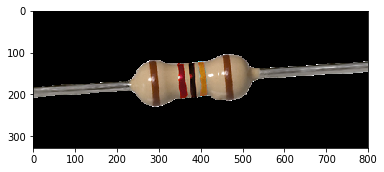

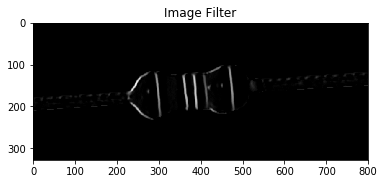

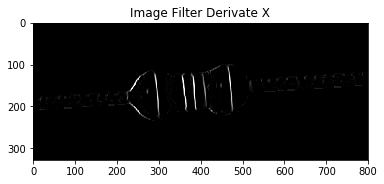

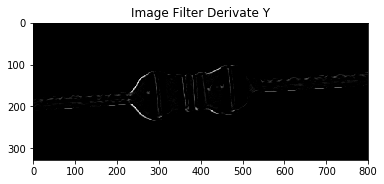

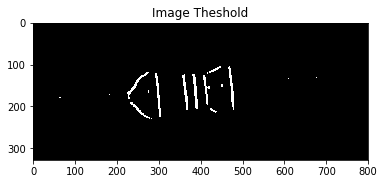

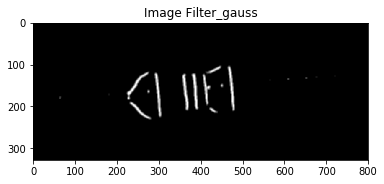

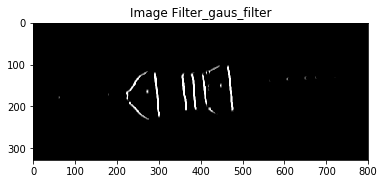

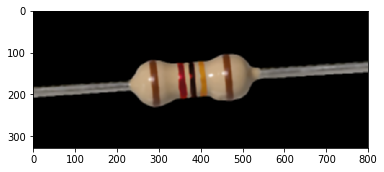

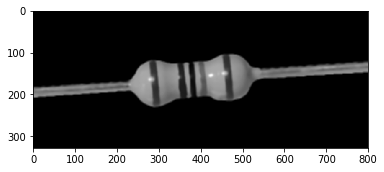

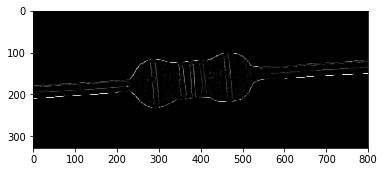

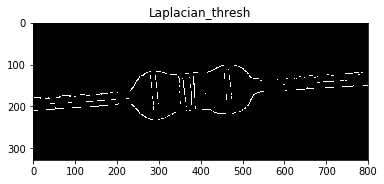

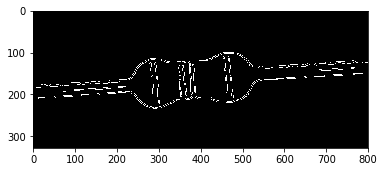

In [330]:

img = cv2.imread("course_images/resistor.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()
img = cv2.medianBlur(img,7)
img = cv2.GaussianBlur(img,(5,5),20)
filter_ = np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])
filter_derivate = np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])
filter_derivateY = np.array([[1,1,1],[1,-2,1],[-1,-1,-1]])
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_filter = cv2.filter2D(img_gray,-1,filter_)

plt.imshow(img_filter,'gray')
plt.title("Image Filter")
plt.show()
img_filterX = cv2.filter2D(img_filter,-1,filter_derivate)
img_filterY= cv2.filter2D(img_filter,-1,filter_derivateY)
plt.imshow(img_filterX,'gray')
plt.title("Image Filter Derivate X")
plt.show()
plt.imshow(img_filterY,'gray')
plt.title("Image Filter Derivate Y")
plt.show()

_,img_filter = cv2.threshold(img_filter, 0.2*np.max(img_filter), 255, cv2.THRESH_BINARY)
plt.imshow(img_filter,'gray')
plt.title("Image Theshold")
plt.show()
img_filter_gauss = cv2.GaussianBlur(img_filter,(5,5),20)
plt.imshow(img_filter_gauss,'gray')
plt.title("Image Filter_gauss")
plt.show()
img_filter_gauss_filter = cv2.filter2D(img_filter_gauss,-1,filter_)

plt.imshow(img_filter_gauss_filter,'gray')
plt.title("Image Filter_gaus_filter")
plt.show()

img_laplacian = cv2.Laplacian(img_gray,cv2.CV_8UC1,ksize=3)
_,img_laplacian_thresh = cv2.threshold(img_laplacian, 0.1*np.max(img_filter), 255, cv2.THRESH_BINARY)
#img_canny = cv2.Canny(img_laplacian,85,170)
img_canny = feature.canny(img_laplacian, sigma=1)
plt.imshow(img)
plt.show()

plt.imshow(img_gray,'gray')
plt.show()
plt.imshow(img_laplacian,'gray')
plt.show()
plt.imshow(img_laplacian_thresh,'gray')
plt.title("Laplacian_thresh")
plt.show()
plt.imshow(img_canny,'gray')
plt.show()

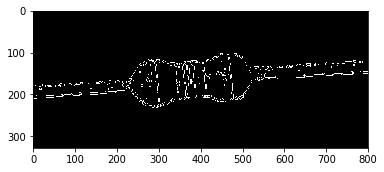

In [325]:
edges = cv2.Canny(img_filter,100,255,cv2.CV_8UC1)
plt.imshow(edges,'gray'); plt.show()

In [326]:
lines = cv2.HoughLines(img_filter,2,np.pi/180,150)

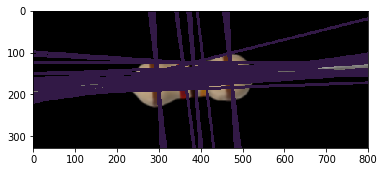

In [327]:
for d,theta in np.squeeze(lines):
    cosseno, seno = np.cos(theta), np.sin(theta)
    x0,y0 = d*cosseno, d*seno
    delta = 1000
    x1,y1 = int(x0 + delta*seno), int(y0 - delta*cosseno)
    x2,y2 = int(x0 - delta*seno), int(y0 + delta*cosseno)
    cv2.line(img,(x1,y1),(x2,y2),(50,25,70),5)
plt.imshow(img,'gray'); plt.show()

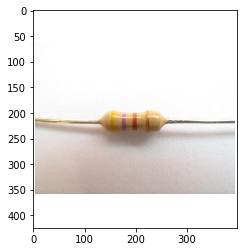

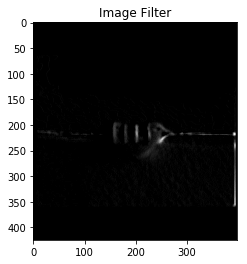

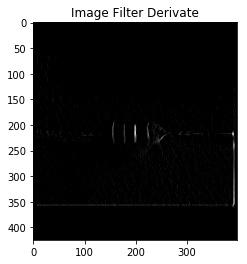

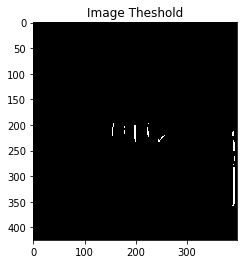

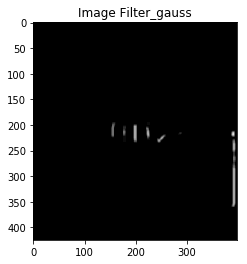

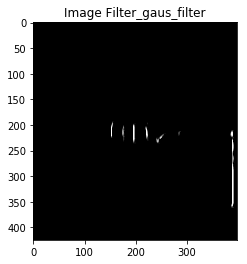

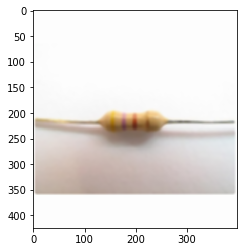

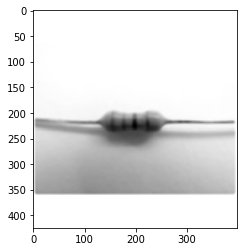

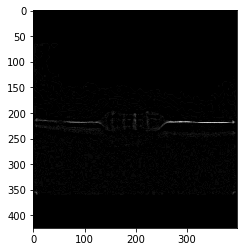

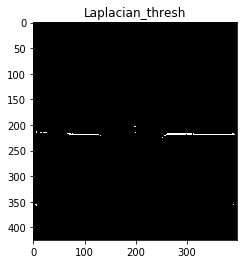

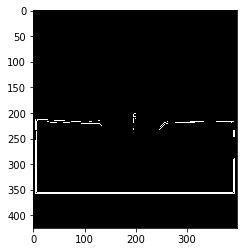

In [304]:

img = cv2.imread("course_images/re.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img = cv2.medianBlur(img,7)
img = cv2.GaussianBlur(img,(5,5),20)
filter_ = np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])
filter_derivate = np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])
filter_derivateY = np.array([[1,1,1],[1,-2,1],[-1,-1,-1]])
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_filter = cv2.filter2D(img_gray,-1,filter_)

plt.imshow(img_filter,'gray')
plt.title("Image Filter")
plt.show()
img_filter = cv2.filter2D(img_filter,-1,filter_derivate)
plt.imshow(img_filter,'gray')
plt.title("Image Filter Derivate")
plt.show()

_,img_filter = cv2.threshold(img_filter, 0.2*np.max(img_filter), 255, cv2.THRESH_BINARY)
plt.imshow(img_filter,'gray')
plt.title("Image Theshold")
plt.show()
img_filter_gauss = cv2.GaussianBlur(img_filter,(5,5),20)
plt.imshow(img_filter_gauss,'gray')
plt.title("Image Filter_gauss")
plt.show()
img_filter_gauss_filter = cv2.filter2D(img_filter_gauss,-1,filter_)
plt.imshow(img_filter_gauss_filter,'gray')
plt.title("Image Filter_gaus_filter")
plt.show()

img_laplacian = cv2.Laplacian(img_gray,cv2.CV_8UC1,ksize=3)
_,img_laplacian_thresh = cv2.threshold(img_laplacian, 0.1*np.max(img_filter), 255, cv2.THRESH_BINARY)
#img_canny = cv2.Canny(img_laplacian,85,170)
img_canny = feature.canny(img_laplacian, sigma=1)
plt.imshow(img)
plt.show()

plt.imshow(img_gray,'gray')
plt.show()
plt.imshow(img_laplacian,'gray')
plt.show()
plt.imshow(img_laplacian_thresh,'gray')
plt.title("Laplacian_thresh")
plt.show()
plt.imshow(img_canny,'gray')
plt.show()

In [305]:
lines = cv2.HoughLines(img_filter,2,np.pi/180,100)

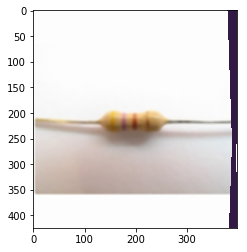

In [306]:
for d,theta in np.squeeze(lines):
    cosseno, seno = np.cos(theta), np.sin(theta)
    x0,y0 = d*cosseno, d*seno
    delta = 1000
    x1,y1 = int(x0 + delta*seno), int(y0 - delta*cosseno)
    x2,y2 = int(x0 - delta*seno), int(y0 + delta*cosseno)
    cv2.line(img,(x1,y1),(x2,y2),(50,25,70),5)
plt.imshow(img,'gray'); plt.show()